In [1]:

from numpy import loadtxt, array, sign,zeros,sort, random,polyfit,flipud,diff, histogram, trapz,pi
from scipy import linspace,sqrt, exp,log #linspace allows us to generate linear array between start and stop points
import scipy.optimize as optimization #curve fitting
import matplotlib.pyplot as plt
#testing goodness of fit
#make pretty comments
from IPython.display import Latex 
#in case we want interactivity
from IPython.html.widgets import interactive 
%pylab inline --no-import-all 

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#Make your own eigenvalues with your own statistics
eigs=sort(random.uniform(.01,1,1000))

In [4]:
#Or import them from a file...
eigs=sort(numpy.loadtxt('DataAnalysis.csv', dtype= 'float', delimiter=','))

In [3]:
def RMT_Staircase(eigs):
    """Takes eigs currently gotten from SAGE for Quantum Graph Stuff and creates
    %staircase. Returns cuml (staircase) and Energy which is used to create
    %cuml
    %Changed on 3/28/14 to only need eigs, if this doesn't work replace num_eng
    %in function and send length(eigs)
    """
    min_eig=min(eigs)
    num_eng=len(eigs)
    max_eig=max(eigs)
    Energy=linspace(min_eig,max_eig,num_eng)
    cuml=zeros(len(Energy))
    for idx in range(len(Energy)):
        for j in range(len(eigs)):
            cuml[idx]=cuml[idx]+0.5*(sign(Energy[idx]-eigs[j])+1)

    plt.step(Energy,cuml)
    return (Energy, cuml)

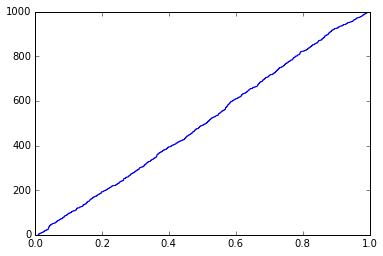

In [6]:
Energy,cuml =RMT_Staircase(eigs)

In [7]:
coeff=polyfit(Energy,cuml,1)
print coeff


[ 1038.09855566   -20.05088817]
[  -20.05088817  1038.09855566]


In [8]:
def Smooth(coeff,Energy,cuml):
    """%set up variables dNdE and smooth
    %Smooth is an array with the smooth part of staircase function gotten from
    %running RMT_Staircase_func.m and fitting to a third order polynomial. 
    %dNdE is the derivative of the smooth part of staircase and is used in
    %unfolding in RMY_NNS.m
    """

    dNdE=zeros(len(Energy))  
    smooth=zeros(len(Energy));
    order=len(coeff) #get order of fit polynomial should be first, but just in case
    coeff=flipud(coeff) #reverse coeff to make it easier to create smooth
    for idx in range(len(Energy)):
        for jdx in range(len(coeff)):
            power=jdx
           
            smooth[idx]=smooth[idx]+coeff[jdx]*pow(Energy[idx],power)   
        
    plt.plot(Energy,smooth)
    plt.plot(Energy,cuml)

    dE=Energy[2]-Energy[1]; #Energy(2) will give the step size
    dNdE=diff(smooth)/dE
    return (dNdE,smooth)

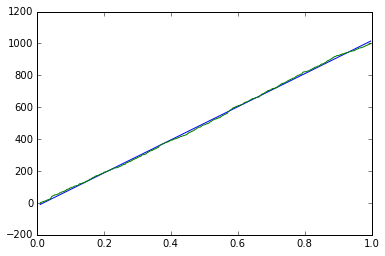

In [9]:
dNdE,smooth=Smooth(coeff,Energy,cuml)

In [10]:
def RMT_NNS(dNdE,eigs,bins):
    diffs=zeros(len(eigs))
     

    diffs=diff(eigs)*dNdE #see Vaa paper

    
    f,x=histogram(diffs,bins,density=True)
    #t=trapz(x,f)
    plt.hist(diffs,bins,normed=1) #%normalize histogram
   
    plt.plot(x,exp(-x),'r') #%Poisson stats
    plt.plot(x,pi/2.*x*exp(-pi/4*x**2)) #%GOE stats
    
  


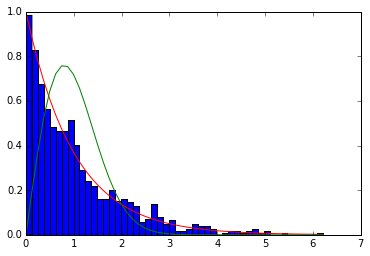

In [11]:
RMT_NNS(dNdE,eigs,50)

In [1]:
from IPython.external import mathjax; mathjax.install_mathjax()

Extracting to /Users/schultzk/.ipython/nbextensions/mathjax


0